In [1]:
#Khai bao thu vien
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler # chuan hoa du lieu
from keras.callbacks import ModelCheckpoint # luu lai huan luyen tot nhat
from tensorflow.keras.models import load_model #tai mo hinh

# Cac lop xay dung mo hinh
from keras.models import Sequential #dau vao
from keras.layers import LSTM #hoc phu thuoc
from keras.layers import Dropout # tranh hoc tu
from keras.layers import Dense # dau ra

#kiem tra do chinh xacs
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error # do sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_percentage_error #do phan tram sai so tuyet doi trung binh



2023-12-17 22:37:39.243478: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('data-model-2016-2019.csv')
df

,Country,city,start,end,year,dengue,T_res
0,VIET NAM,NaN,2016-01-03,2016-01-09,2016,2105,Week
1,VIET NAM,NaN,2016-01-10,2016-01-16,2016,2545,Week
2,VIET NAM,NaN,2016-01-17,2016-01-23,2016,2838,Week
3,VIET NAM,NaN,2016-01-24,2016-01-30,2016,2740,Week
4,VIET NAM,NaN,2016-01-31,2016-02-06,2016,2421,Week
...,...,...,...,...,...,...,...
203,VIET NAM,NaN,2019-11-24,2019-11-30,2019,7568,Week
204,VIET NAM,NaN,2019-12-01,2019-12-07,2019,7187,Week
205,VIET NAM,NaN,2019-12-08,2019-12-14,2019,6654,Week
206,VIET NAM,NaN,2019-12-15,2019-12-21,2019,5017,Week


In [3]:
from pandas.io.sql import to_datetime
# dinh dang cau truc thoi gian
df["start"] = pd.to_datetime(df['start'], format="%Y-%m-%d")
df["end"] = pd.to_datetime(df['end'], format="%Y-%m-%d")


In [4]:
df.info()
# 1 cot ngay theo thoi gian, 1 cot so nguyen, k co gia tri trong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  208 non-null    object        
 1   city     0 non-null      float64       
 2   start    208 non-null    datetime64[ns]
 3   end      208 non-null    datetime64[ns]
 4   year     208 non-null    int64         
 5   dengue   208 non-null    int64         
 6   T_res    208 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.describe()

,city,start,end,year,dengue
count,0.0,208,208,208.000000,208.000000
mean,NaN,2017-12-27 12:00:00,2018-01-02 12:00:00,2017.490385,3081.100962
min,NaN,2016-01-03 00:00:00,2016-01-09 00:00:00,2016.000000,411.000000
25%,NaN,2016-12-30 06:00:00,2017-01-05 06:00:00,2016.750000,1305.750000
50%,NaN,2017-12-27 12:00:00,2018-01-02 12:00:00,2017.000000,2348.000000
75%,NaN,2018-12-24 18:00:00,2018-12-30 18:00:00,2018.000000,3776.750000
max,NaN,2019-12-22 00:00:00,2019-12-28 00:00:00,2019.000000,9720.000000
std,NaN,NaN,NaN,1.116371,2363.804263


In [6]:
#lay data
df1= pd.DataFrame(df,columns=['start','dengue'])
df1
# df1.index=df1['Date']
# df1.drop("Date",axis =1, inplace = True)

,start,dengue
0,2016-01-03,2105
1,2016-01-10,2545
2,2016-01-17,2838
3,2016-01-24,2740
4,2016-01-31,2421
...,...,...
203,2019-11-24,7568
204,2019-12-01,7187
205,2019-12-08,6654
206,2019-12-15,5017


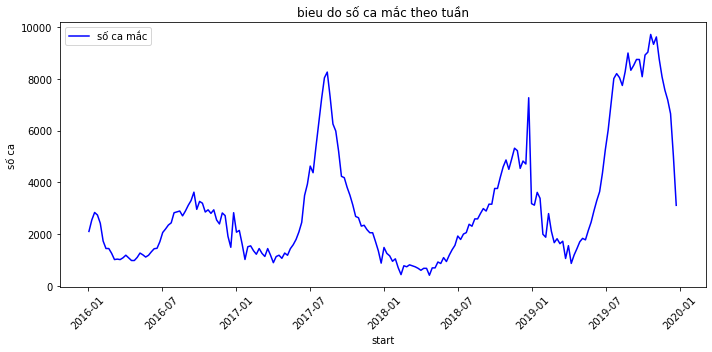

In [7]:
#Ve bieu do
plt.figure(figsize = (10,5))
plt.plot(df1['start'],df1['dengue'], label='số ca mắc', color='blue')
plt.title('bieu do số ca mắc theo tuần')
plt.xlabel('start')
plt.ylabel('số ca')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df1.index=df1['start']
df1.drop("start",axis =1, inplace = True)

In [9]:
data=df1.values

train_data = data[:160] # 160 mau dau tien
test_data = data[160:]
data

array([[2105],
       [2545],
       [2838],
       [2740],
       [2421],
       [1734],
       [1445],
       [1444],
       [1257],
       [1018],
       [1035],
       [1017],
       [1085],
       [1186],
       [1084],
       [ 981],
       [ 981],
       [1100],
       [1269],
       [1201],
       [1115],
       [1183],
       [1318],
       [1437],
       [1453],
       [1708],
       [2064],
       [2200],
       [2352],
       [2437],
       [2827],
       [2861],
       [2894],
       [2707],
       [2893],
       [3114],
       [3300],
       [3623],
       [2959],
       [3265],
       [3196],
       [2856],
       [2940],
       [2804],
       [2940],
       [2548],
       [2395],
       [2819],
       [2717],
       [1917],
       [1492],
       [2829],
       [2076],
       [2144],
       [1616],
       [1021],
       [1514],
       [1547],
       [1360],
       [1223],
       [1444],
       [1256],
       [1137],
       [1442],
       [1187],
       [ 897],
       [11

In [10]:
#chuan hoa du lieu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [11]:
# tao vong lap cac gia tri
x_train, y_train =[],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])
    y_train.append(sc_train[i,0])

In [12]:
x_train

[array([0.18197443, 0.22924052, 0.26071544, 0.25018799, 0.21592008,
        0.14212053, 0.1110753 , 0.11096788, 0.09087979, 0.06520571,
        0.0670319 , 0.06509829, 0.07240305, 0.08325277, 0.07229563,
        0.06123107, 0.06123107, 0.07401439, 0.09216887, 0.08486411,
        0.07562574, 0.0829305 , 0.09743259, 0.11021592, 0.11193469,
        0.13932753, 0.17757009, 0.19217961, 0.2085079 , 0.21763884,
        0.25953378, 0.26318616, 0.26673112, 0.24664303, 0.2666237 ,
        0.29036416, 0.31034483, 0.34504243, 0.27371361, 0.30658503,
        0.29917284, 0.26264905, 0.27167257, 0.25706306, 0.27167257,
        0.22956279, 0.21312708, 0.2586744 , 0.24771726, 0.16177892]),
 array([0.22924052, 0.26071544, 0.25018799, 0.21592008, 0.14212053,
        0.1110753 , 0.11096788, 0.09087979, 0.06520571, 0.0670319 ,
        0.06509829, 0.07240305, 0.08325277, 0.07229563, 0.06123107,
        0.06123107, 0.07401439, 0.09216887, 0.08486411, 0.07562574,
        0.0829305 , 0.09743259, 0.11021592, 0.

In [13]:
# xep du lieu thanh 1 mang
x_train = np.array(x_train)
y_train = np.array(y_train)

#xep thanh mang 1 chieu
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [14]:
x_train.shape
y_train.shape

(110, 1)

# Xây dựng và huấn luyện mô hình

In [15]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
#su dung trinh toi uu hoa adam

2023-12-17 22:39:01.625356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-17 22:39:01.628381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-17 22:39:01.631163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [27]:
save_model="Notebooks/data/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True, mode = 'auto')
history=model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 2559.68091, saving model to Notebooks/data/save_model.hdf5
3/3 - 1s - loss: 2559.6809 - 508ms/epoch - 169ms/step
Epoch 2/100

Epoch 2: loss did not improve from 2559.68091
3/3 - 0s - loss: 2559.9373 - 350ms/epoch - 117ms/step
Epoch 3/100

Epoch 3: loss improved from 2559.68091 to 2558.80225, saving model to Notebooks/data/save_model.hdf5
3/3 - 0s - loss: 2558.8022 - 362ms/epoch - 121ms/step
Epoch 4/100

Epoch 4: loss did not improve from 2558.80225
3/3 - 0s - loss: 2559.7368 - 350ms/epoch - 117ms/step
Epoch 5/100

Epoch 5: loss did not improve from 2558.80225
3/3 - 0s - loss: 2558.8164 - 339ms/epoch - 113ms/step
Epoch 6/100

Epoch 6: loss did not improve from 2558.80225
3/3 - 0s - loss: 2559.5625 - 458ms/epoch - 153ms/step
Epoch 7/100

Epoch 7: loss did not improve from 2558.80225
3/3 - 1s - loss: 2559.4182 - 507ms/epoch - 169ms/step
Epoch 8/100

Epoch 8: loss improved from 2558.80225 to 2558.51001, saving model to Notebooks/data/save_mod

In [28]:
# du lieu train
y_train = sc.inverse_transform(y_train) # số ca thực tế
final_model=load_model('Notebooks/data/save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict= sc.inverse_transform(y_train_predict) # số ca dự đoán

2023-12-17 22:45:20.342991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-17 22:45:20.350069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-17 22:45:20.358207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 2s 46ms/step


KeyError: 'val_loss'

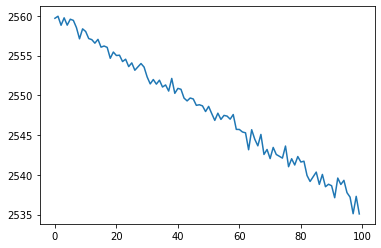

In [29]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ sự biến đổi của mô hình qua các epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Sử dụng mô hình

In [18]:
# xu ly du lieu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test=sc.transform(test)

x_test =[]
for i in range(50,test.shape[0]):
    x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# du lieu test
y_test = data[160:]
y_test_predict= final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

2/2 [==============================] - 0s 29ms/step


In [19]:
y_test_predict

array([[2960.8918],
       [2424.6855],
       [1921.741 ],
       [1720.8226],
       [1646.313 ],
       [1592.081 ],
       [1592.1306],
       [1593.8684],
       [1618.2976],
       [1520.1892],
       [1456.1973],
       [1295.9098],
       [1165.3113],
       [1138.7949],
       [1259.4263],
       [1505.2924],
       [1789.127 ],
       [2124.681 ],
       [2503.927 ],
       [2936.004 ],
       [3402.2175],
       [3858.1277],
       [4358.9307],
       [4967.8687],
       [5651.2744],
       [6397.4395],
       [7146.752 ],
       [7579.476 ],
       [7484.5537],
       [6926.6167],
       [6376.741 ],
       [6162.7695],
       [6053.978 ],
       [6095.4414],
       [6264.1055],
       [6441.41  ],
       [6382.1577],
       [6387.888 ],
       [6440.876 ],
       [6661.5405],
       [6794.5527],
       [6876.529 ],
       [6664.9863],
       [6195.798 ],
       [5643.4062],
       [5170.1587],
       [4809.1475],
       [4314.036 ]], dtype=float32)

## Độ chính xác

/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_6492/3804912678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['du doan']= y_train_predict
/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_6492/3804912678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['du doan'] = y_test_predict


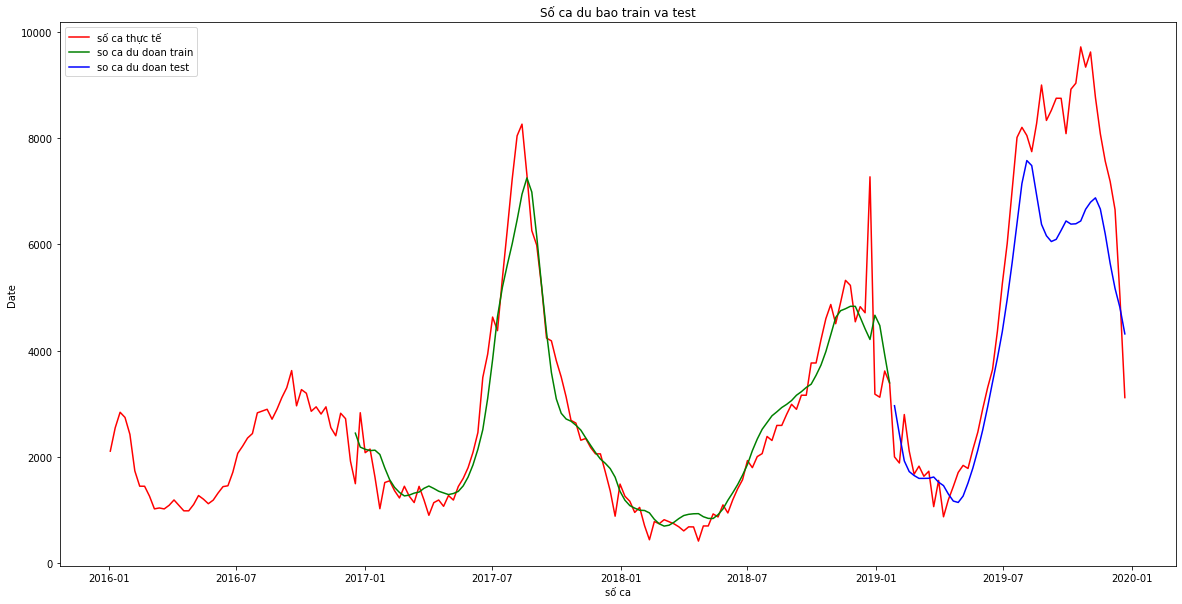

In [20]:
#lap bieu do so sanh
train_data1 = df1[50:160]
test_data1 = df1[160:]

plt.figure(figsize=(20,10))
plt.plot(df1,label='số ca thực tế',color = 'red') # 
train_data1['du doan']= y_train_predict
plt.plot(train_data1['du doan'], label='so ca du doan train', color = 'green') #du bao train
test_data1['du doan'] = y_test_predict
plt.plot(test_data1['du doan'], label = 'so ca du doan test', color = 'blue') #du bao test
plt.title('Số ca du bao train va test')
plt.xlabel('số ca')
plt.ylabel('Date')
plt.legend()
plt.show()

In [21]:
print('do phu hop tap train', r2_score(y_train,y_train_predict)) 

print('Sai so tuyet doi trung binh tap train:', mean_absolute_error(y_train,y_train_predict))


do phu hop tap train 0.9131355147813943
Sai so tuyet doi trung binh tap train: 341.29816728071734


In [22]:
train_data1

,dengue,du doan
start,,
2016-12-18,1492,2444.148682
2016-12-25,2829,2181.058594
2017-01-01,2076,2140.506348
2017-01-08,2144,2115.010986
2017-01-15,1616,2123.486328
...,...,...
2018-12-23,7273,4209.012695
2018-12-30,3179,4665.427246
2019-01-06,3121,4471.981445


In [23]:
print('do phu hop tap test', r2_score(y_test,y_test_predict)) #44%

print('Sai so tuyet doi trung binh tap train:', mean_absolute_error(y_test,y_test_predict))


do phu hop tap test 0.7835748377405627
Sai so tuyet doi trung binh tap train: 1116.3659489949544


In [24]:
test_data1


,dengue,du doan
start,,
2019-01-27,1997,2960.891846
2019-02-03,1882,2424.685547
2019-02-10,2795,1921.740967
2019-02-17,2109,1720.822632
2019-02-24,1671,1646.312988
2019-03-03,1823,1592.081055
2019-03-10,1632,1592.130615
2019-03-17,1727,1593.868408
2019-03-24,1060,1618.297607
